In [1]:
file_path_house = '../full_simplified/full_simplified_house.ndjson'
file_path_nail = "full_simplified_nail.ndjson"
file_path_fan = 'full_simplified_fan.ndjson'
file_path_dishwasher = '../full_simplified/full_simplified_dishwasher.ndjson'
file_path_blackberry = 'full_simplified_blackberry.ndjson'
file_path_leaf = 'full_simplified_leaf.ndjson'
file_path_mona = '../full_simplified/full_simplified_The Mona Lisa.ndjson'

In [12]:
import json
import matplotlib
import matplotlib.pyplot as plt

def draw_from_ndjson(file_path, target_key_id, save_path):
    with open(file_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            if data['key_id'] == str(target_key_id):
                draw_house(data['drawing'])
                break

def draw_house(drawing_data):
    plt.figure(figsize=(1.5, 1))
    for stroke in drawing_data:
        plt.plot(stroke[0], [y for y in stroke[1]], color='black', linewidth=1)  
    plt.axis('off')
    plt.gca().invert_yaxis() 
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()

file_path = file_path_house
target_key_id = 5281047786815488
save_path = '../scripts/tooltip-leaf.png'
draw_from_ndjson(file_path, target_key_id, save_path)


In [32]:
# Notes : nail tooltip keyid = 5630185493757952
#     house tooltip key id = 5089582271954944 
# fan key id = 5118763739381760
# dishwasher key id = 5915257874677760 and 6673181093920768
# blackberry = 5098333183934464 and 6424154557382656
# canadaleaf = 6216938227236864 
#normalleaf = 6649062268862464

Drawing found for key_id: 4777124122591232


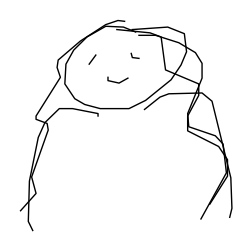

In [4]:
import json
import matplotlib.pyplot as plt

def draw_from_ndjson(file_path, target_key_id):
    found = False
    with open(file_path, 'r') as file:
        for line in file:
            data = json.loads(line)
            if data['key_id'] == str(target_key_id):
                print(f"Drawing found for key_id: {target_key_id}")
                draw_image(data['drawing'])
                found = True
                break

    if not found:
        print(f"No drawing found for key_id: {target_key_id}")

def draw_image(drawing_data):
    plt.figure(figsize=(3, 3))
    for stroke in drawing_data:
        plt.plot(stroke[0], [y for y in stroke[1]], color='black', linewidth=1)  
    plt.axis('off')
    plt.gca().invert_yaxis() 
    plt.show()

file_path = file_path_mona  
target_key_id = 4777124122591232
draw_from_ndjson(file_path, target_key_id)
